<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C101_Activity_4_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 4.1.8 Selecting features

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.


## Objective
The goal is to apply feature engineering methods to preprocess the data, perform feature selection, and evaluate how feature engineering and selection affect the performance of a predictive model.


## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
*   Apply data preprocessing methods to prepare the data for analysis.
*   Perform feature learning and feature selection to optimise the model’s performance.


## Activity guidance:
1. Import the relevant libraries for data analysis, visualisation, and machine learning.
2. Explore the data set to understand the features.
3. Preprocess the data, handling missing values and encoding categorical variables as needed.
4. Apply feature scaling.
5. Determine if there is multicollinearity.
6. Determine the importance of features with MI and perform feature selection with RFE.
7. Create a heatmap to evaluate possible correlation coefficients.
8. Create target and input features DataFrames.
9. Determine feature importance and perform feature selection.

In [38]:
# Start your activity here:

# Step 1: Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the relevant libraries for data analysis, visualisation, and machine learning.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE


# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"



**Define Utility Functions**

In [13]:
def linearRegressionModel(X, y):
    # Train a linear regression model on all features using sklearn
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions on the complete data
    y_pred_all = model.predict(X)

    # Calculate the mean squared error
    mse_all = mean_squared_error(y, y_pred_all)

    # Calculate the R-squared
    r2_all = r2_score(y, y_pred_all)


    # Print the mean squared error
    print('MSE :', mse_all)
    # Print R-squared
    print('R-squared :', r2_all)


    # Adding a constant to the model for statsmodels
    X_sm = sm.add_constant(X)

    # Fit the model using statsmodels
    model_sm = sm.OLS(y, X_sm).fit()

    # Print the summary which includes p-values
    print(model_sm.summary())

In [14]:
x = pd.read_csv(url)

In [15]:
x.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# Drop the 'car_ID' column – redundant index. CarName is not categorical
data = x.drop(columns=['car_ID','CarName'])

# View the first 10 rows of the DataFrame.
print(data.shape)

(205, 24)


# Explore the data set to understand the features.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [18]:
# Filter the DataFrame for numerical
numerical_df = data.select_dtypes(include=['float64', 'int64']).columns
# Filter the DataFrame for catagorical
catagorical_df = data.select_dtypes(include=['object']).columns

In [19]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [20]:
# # Create a pair plot
# sns.pairplot(data, hue='price', diag_kind='kde')
# # Display the plot
# plt.suptitle('Pair Plot of Dataset', y=1.02)
# plt.show()

## Detailed Analysis
**Strong Predictors of Price**

Variables like enginesize, curbweight, carlength, and wheelbase show strong correlations with price. These variables are likely to be strong predictors and should be included in the regression model.

**Multicollinearity Concerns**

Variables like carlength and wheelbase have a high correlation (multicollinearity). Including both in a regression model might not add much value and can cause issues with multicollinearity.
It's often a good practice to choose one of these variables.

**Non-Predictive Features**

Variables such as compressionratio, stroke, and others with weak correlations to price might not be very useful in the regression model. Including non-predictive features can add noise to the model.

From the correlation matrix, the features with weak or negligible correlation with price include:

Stroke:

Correlation with price: 0.079
This indicates a very weak relationship with the price, suggesting it is not a significant predictor.

Compression Ratio:

Correlation with price: 0.068
This also shows a very weak relationship, indicating it does not significantly predict vehicle price.

Car Height (carheight):

Correlation with price: 0.12
Although slightly higher, this correlation is still quite weak and suggests that carheight is not a strong predictor of price.

**Select all numerical predictors**

In [21]:
X = data[numerical_df].drop('price', axis=1)
y = data['price']

linearRegressionModel(X, y)

MSE : 9407873.764863726
R-squared : 0.851868852264291
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           7.97e-71
Time:                        17:59:27   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# Significant Features
**Features with p-values less than 0.05 are generally considered statistically significant:**

* enginesize: Coefficient = 116.78, p-value = 0.000
** Larger engine sizes are strongly associated with higher prices.
* stroke: Coefficient = -3056.16, p-value = 0.000
** Larger strokes are strongly associated with lower prices.
* compressionratio: Coefficient = 286.48, p-value = 0.001
** Higher compression ratios are associated with higher prices.
* horsepower: Coefficient = 32.50, p-value = 0.047
** More horsepower is significantly associated with higher prices.
* peakrpm: Coefficient = 2.36, p-value = 0.001
** Higher peak RPM is significantly associated with higher prices.

## Features to Reconsider

* symboling: Coefficient = 285.88, p-value = 0.242
** Not statistically significant.
* wheelbase: Coefficient = 167.70, p-value = 0.120
** Not statistically significant.
* carlength: Coefficient = -94.82, p-value = 0.089
** Not statistically significant.
* carwidth: Coefficient = 466.62, p-value = 0.061
** Close to significance but not below the threshold.
* carheight: Coefficient = 194.75, p-value = 0.160
** Not statistically significant.
* curbweight: Coefficient = 1.88, p-value = 0.281
** Not statistically significant.
* boreratio: Coefficient = -984.43, p-value = 0.411
** Not statistically significant.
* citympg: Coefficient = -286.94, p-value = 0.112
** Not statistically significant.
* highwaympg: Coefficient = 191.30, p-value = 0.233
** Not statistically significant.

# Recommendations for Feature Selection
Based on the coefficients and their statistical significance:

**Include Significant Features:**

* enginesize
* stroke
* compressionratio
* horsepower
* peakrpm

**Potentially Exclude or Further Investigate:**

* symboling
* wheelbase
* carlength
* carwidth
* carheight
* curbweight
* boreratio
* citympg
* highwaympg

In [22]:
# Select significant predictors based on pair plot analysis
X = data[['enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
 # Use the 'data' DataFrame instead of 'numerical_df'
y = data['price']

sig_pred = linearRegressionModel(X, y)

MSE : 11144259.60517504
R-squared : 0.8245286865832866
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           3.59e-73
Time:                        17:59:27   Log-Likelihood:                -1954.1
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     199   BIC:                             3940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

## Preprocess the data, handling missing values and encoding categorical variables as needed.


In [23]:
data[catagorical_df].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [41]:
# One-hot encoding
encoded_cat_data = pd.get_dummies(data,
                           columns=["fueltype", "aspiration","doornumber","carbody","drivewheel","enginelocation","cylindernumber","fuelsystem","enginetype"],drop_first=True)

encoded_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [25]:
encoded_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

# Apply feature scaling.


# Observations from the Scatter Plot Matrix
**Normal Distribution:**

Some features, such as enginesize and curbweight, appear to follow a relatively normal distribution.
Normal distribution is indicated by the bell-shaped curve in the histogram plots on the diagonal.

**Non-Normal Distribution:**

Features like stroke and compressionratio show distributions that are not normal.
These features might have skewed distributions or contain outliers.

**Outliers:**

Outliers are evident in several scatter plots, where certain data points lie far from the rest of the data.
Outliers can significantly affect the performance of some scaling methods like Min-Max Scaling.

**Correlations:**

There are strong linear relationships between some features (e.g., carlength and curbweight).
Correlation affects how different scaling methods might perform, especially for regression models.

**Recommended Scaling Method**
Considering the observations, the most suitable feature scaling methods are:

**Standardization (Z-score normalization):**

Standardization is effective for features that follow a normal distribution.
It scales the features to have a mean of 0 and a standard deviation of 1, which helps in handling features with different scales.
Less sensitive to outliers compared to Min-Max Scaling.
Robust Scaling:

Robust Scaling is beneficial for features with outliers or non-normal distributions.
It uses the median and the interquartile range (IQR) for scaling, which makes it robust to outliers.
Suitable for features like stroke and compressionratio which show non-normal distributions.

In [28]:
data[numerical_df].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
# Filter the DataFrame for numerical
numerical_df = encoded_cat_data.select_dtypes(include=['float64', 'int64'])  # Select the numerical DataFrame
# Filter the DataFrame for categorical
categorical_df = encoded_cat_data.select_dtypes(include=['bool'])  # Select the categorical DataFrame

# Separating numerical and categorical features
numerical_features = numerical_df.columns  # Get columns from numerical DataFrame
categorical_features = categorical_df.columns  # Get columns from categorical DataFrame

# Scaling numerical features
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(encoded_cat_data[numerical_features])

# Converting scaled data back to DataFrame
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Extract the categorical features into a DataFrame
categorical_df_subset = encoded_cat_data[categorical_features]

# Reset index of categorical features to match the numerical features index
categorical_df_subset.reset_index(drop=True, inplace=True)

# Combine scaled numerical features with original categorical features
scaled_df = pd.concat([numerical_scaled_df, categorical_df_subset], axis=1)

scaled_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,False,True,False,False,False,False,False,False,False,False
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,False,True,False,False,False,False,False,False,False,False
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,False,True,False,False,False,False,False,False,True,False
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,False,True,False,False,False,False,True,False,False,False
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,False,True,False,False,False,False,True,False,False,False


In [30]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    float64
 6   enginesize             205 non-null    float64
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    float64
 11  peakrpm                205 non-null    float64
 12  citympg                205 non-null    float64
 13  highwaympg             205 non-null    float64
 14  price                  205 non-null    float64
 15  fuelty

# Determine if there is multicollinearity.


In [31]:
# Filter the DataFrame for numerical
scaled_num_df = scaled_df.select_dtypes(include=['float64',])  # Select the numerical DataFrame
# Filter the DataFrame for categorical
scaled_cat_df = scaled_df.select_dtypes(include=['bool'])  # Select the categorical DataFrame

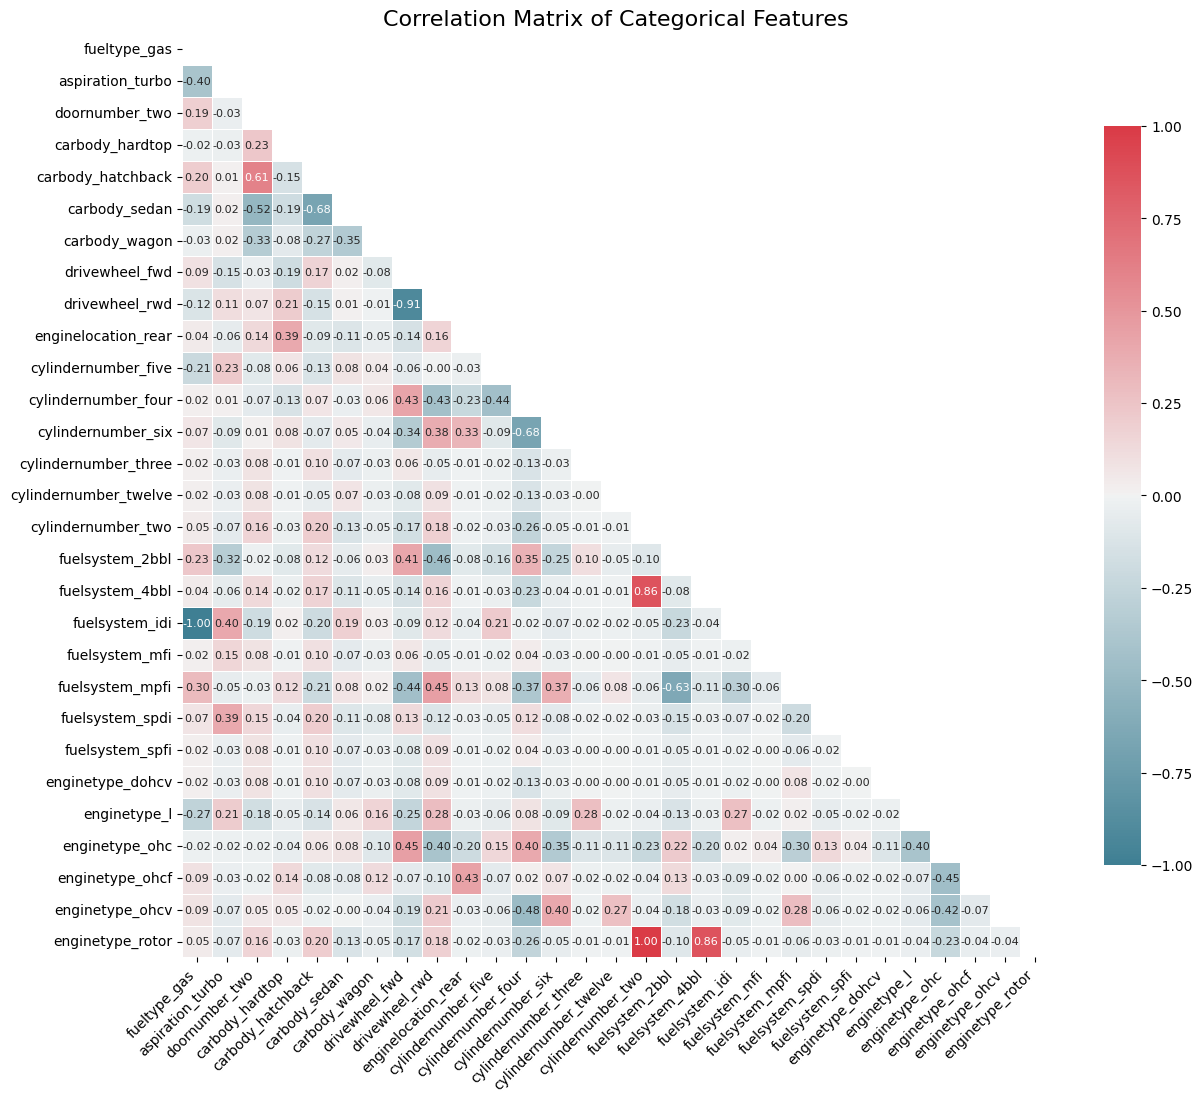

In [32]:
# Calculate correlation matrix
corr_matrix = scaled_cat_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot heatmap with annotations and improved settings
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size": 8})

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Categorical Features', fontsize=16)
plt.show()

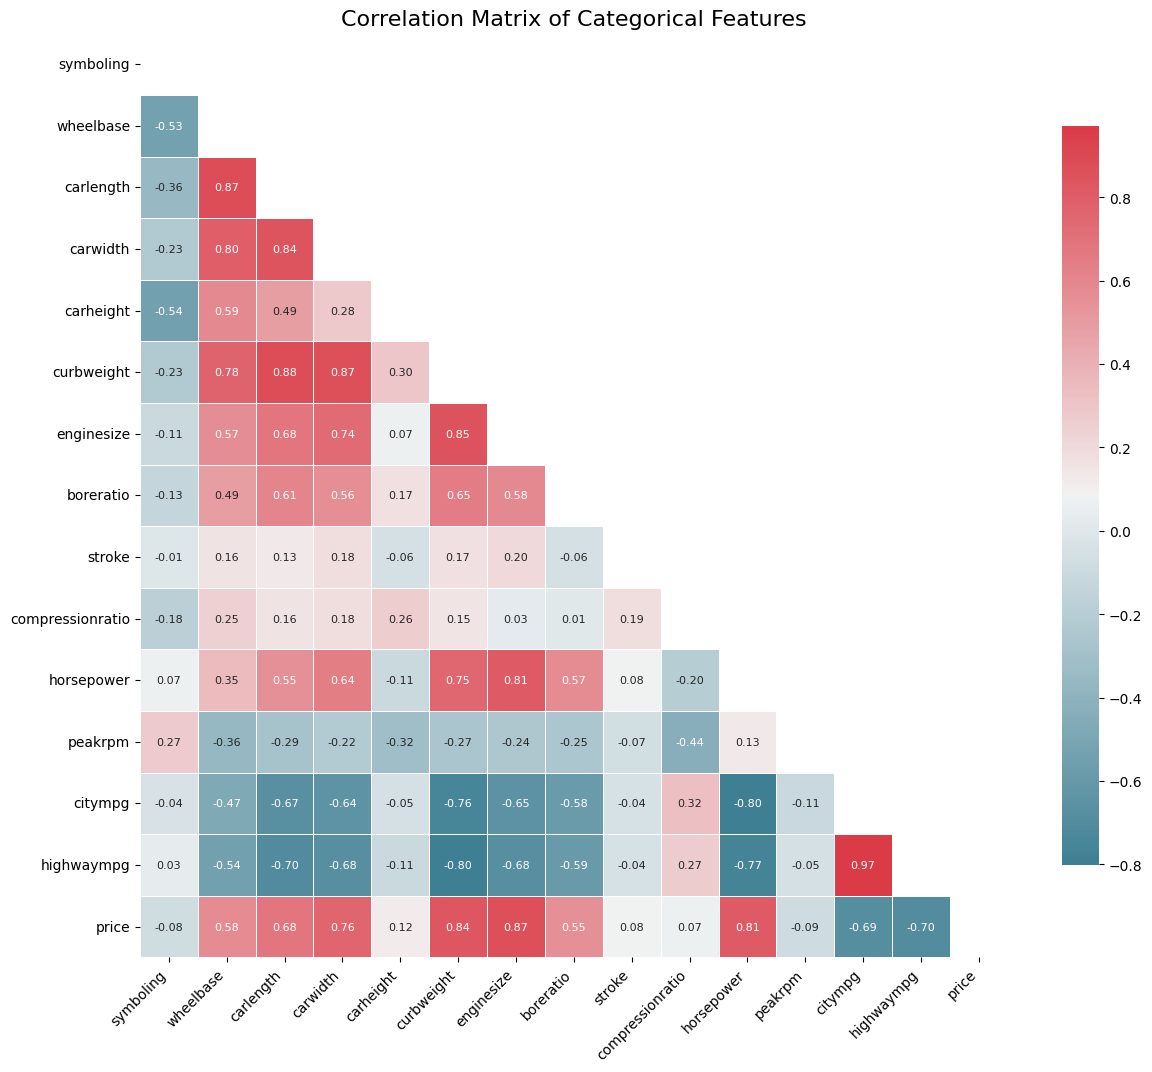

In [33]:
# Calculate correlation matrix
corr_matrix = scaled_num_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype='float64'))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot heatmap with annotations and improved settings
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size": 8})

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Categorical Features', fontsize=16)
plt.show()

# Determine the importance of features with MI and perform feature selection with RFE.

In [36]:

# Set the variables for features and target
X = scaled_df.drop('price', axis=1)
y = scaled_df['price']

# Split the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(164, 43) (41, 43)
(164,) (41,)


**Determine Feature Importance with Mutual Information**

In [39]:
# Calculate mutual information between each feature and the target
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi, index=X_train.columns)
mi.sort_values(ascending=False, inplace=True)

# Display mutual information scores
print("Mutual Information Scores:")
print(mi)

Mutual Information Scores:
horsepower               9.241128e-01
highwaympg               8.424264e-01
curbweight               8.261649e-01
enginesize               8.021605e-01
citympg                  7.428243e-01
carwidth                 6.687126e-01
carlength                5.745413e-01
wheelbase                5.007268e-01
boreratio                3.756199e-01
fuelsystem_2bbl          3.471460e-01
fuelsystem_mpfi          3.358384e-01
drivewheel_rwd           3.214196e-01
stroke                   3.160764e-01
carheight                3.088130e-01
drivewheel_fwd           2.917280e-01
cylindernumber_four      2.558662e-01
symboling                2.235672e-01
peakrpm                  1.827115e-01
cylindernumber_six       1.715496e-01
carbody_hatchback        1.242477e-01
compressionratio         1.175576e-01
aspiration_turbo         9.712448e-02
enginetype_ohc           7.215204e-02
enginetype_ohcv          6.482410e-02
cylindernumber_five      5.113104e-02
enginetype_l           

# Interpretation of Mutual Information Scores
**Top Features:**

horsepower: With a score of 0.924, this feature has the highest mutual information with price.
highwaympg, curbweight, enginesize: These features also have high mutual information scores, indicating their strong relationship with price.

Moderately Important Features:

citympg, carwidth, carlength, wheelbase: These features have moderate mutual information scores and contribute significantly to predicting price.

Less Important Features:

fuelsystem_mfi, enginelocation_rear, doornumber_two: These features have zero mutual information, indicating they have no contribution to predicting price.

**Perform Feature Selection with RFE**

In [40]:
# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select the top n features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the ranking of the features
ranking = pd.Series(rfe.ranking_, index=X_train.columns)
selected_features = X_train.columns[rfe.support_]

# Display the ranking of the features
print("RFE Ranking of Features:")
print(ranking.sort_values())

# Display the selected features
print("Selected Features by RFE:")
print(selected_features)

RFE Ranking of Features:
fuelsystem_mfi            1
cylindernumber_four       1
enginelocation_rear       1
enginesize                1
enginetype_ohcv           1
cylindernumber_six        2
cylindernumber_five       3
carbody_hardtop           4
carbody_hatchback         5
carbody_wagon             6
carbody_sedan             7
carwidth                  8
fuelsystem_spdi           9
aspiration_turbo         10
enginetype_ohc           11
stroke                   12
fueltype_gas             13
fuelsystem_idi           14
compressionratio         15
peakrpm                  16
cylindernumber_two       17
fuelsystem_4bbl          18
cylindernumber_three     19
curbweight               20
enginetype_rotor         21
carlength                22
horsepower               23
highwaympg               24
drivewheel_rwd           25
wheelbase                26
boreratio                27
fuelsystem_mpfi          28
fuelsystem_2bbl          29
enginetype_l             30
symboling              

# Create a heatmap to evaluate possible correlation coefficients.

# Create target and input features DataFrames.

# Determine feature importance and perform feature selection.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.